In [1]:
!pip install tensorflow

You should consider upgrading via the 'C:\Users\pp\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

### Task: Build a produce (Corn and Olives) detector.

In [3]:
dataset = pd.DataFrame.from_dict({
    'shape': ['round', 'oval'],
    'color': ['yellow', 'green'],
    'produce': ['corn', 'olives']
})

dataset

,shape,color,produce
0,round,yellow,corn
1,oval,green,olives


In [7]:
# Convert parameters to machine learning understandable form.

dataset['c_shape'] = dataset['shape'].apply(lambda x: 1 if x == 'round' else 0)
dataset['c_color'] = dataset['color'].apply(lambda x: 1 if x == 'yellow' else 0)
dataset['c_produce'] = dataset['produce'].apply(lambda x: 1 if x == 'corn' else 0)

In [8]:
dataset

,shape,color,produce,c_shape,c_color,c_produce
0,round,yellow,corn,1,1,1
1,oval,green,olives,0,0,0


<AxesSubplot:xlabel='c_shape', ylabel='c_color'>

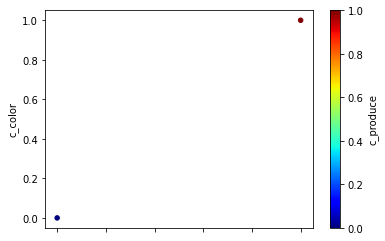

In [12]:
dataset.plot(
    kind='scatter',
    x='c_shape',
    y='c_color',
    c='c_produce',
    colormap='jet'
)